In [1]:
pip install pdfplumber pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
mkdir vre_reports

In [21]:
import os
import re
import pdfplumber
import pandas as pd
from pathlib import Path

# ---------------------------------------------
# 📁 1️⃣ Path to your folder with REMC/VRE PDFs
# ---------------------------------------------
folder_path = Path("vre_reports")

# ---------------------------------------------
# 📦 2️⃣ Initialize empty data list
# ---------------------------------------------
data_list = []

# ---------------------------------------------
# 🔁 3️⃣ Loop through PDFs
# ---------------------------------------------
for file in sorted(folder_path.glob("*.pdf")):
    # Extract text from all pages
    text = ''
    with pdfplumber.open(file) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text

    # ✅ 4️⃣ Extract date from filename correctly
    file_date = file.stem.replace(".", "-")  # e.g., 01.01.2025 → 01-01-2025

    # ---------------------------------------------
    # 🔍 5️⃣ Regex search with commas allowed
    # ---------------------------------------------
    wind_match = re.search(r"Wind.*?([\d,]+)", text, re.IGNORECASE)
    solar_match = re.search(r"Solar.*?([\d,]+)", text, re.IGNORECASE)
    vre_match = re.search(r"(?:Total|RE|VRE).*?([\d,]+)", text, re.IGNORECASE)

    # ---------------------------------------------
    # 🔢 6️⃣ Helper to parse safely
    # ---------------------------------------------
    def parse_mw(match):
        if match:
            value = match.group(1)
            if value:
                value = value.replace(",", "").strip()
                return int(value) if value else None
        return None

    wind_mw = parse_mw(wind_match)
    solar_mw = parse_mw(solar_match)
    vre_mw = parse_mw(vre_match)

    # ✅ Debug: See what you’re appending
    print({
        "date": file_date,
        "wind_generation_mw": wind_mw,
        "solar_generation_mw": solar_mw,
        "vre_generation_mw": vre_mw
    })

    # ---------------------------------------------
    # 📥 7️⃣ Append to data list
    # ---------------------------------------------
    data_list.append({
        "date": file_date,
        "wind_generation_mw": wind_mw,
        "solar_generation_mw": solar_mw,
        "vre_generation_mw": vre_mw
    })

# ---------------------------------------------
# 🧾 8️⃣ Create DataFrame
# ---------------------------------------------
df = pd.DataFrame(data_list)

# ---------------------------------------------
# 📅 9️⃣ Clean date & sort
# ---------------------------------------------
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df = df.sort_values('date').reset_index(drop=True)

# ✅ Optional: Check difference
df['difference'] = df['vre_generation_mw'] - (
    df['wind_generation_mw'] + df['solar_generation_mw']
)
print(df[['date', 'difference']].head())

# ---------------------------------------------
# 💾 🔟 Save output with index=False
# ---------------------------------------------
df.to_csv("vre_summary.csv", index=False)
print("✅ Done! Saved to vre_summary.csv with clean dates and safe parsing.")



{'date': '01-01-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 700, 'vre_generation_mw': 2}
{'date': '01-02-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 700, 'vre_generation_mw': 2}
{'date': '01-03-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 600, 'vre_generation_mw': 2}
{'date': '01-04-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_generation_mw': 2}
{'date': '01-05-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_generation_mw': 2}
{'date': '01-06-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_generation_mw': 2}
{'date': '01-07-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_generation_mw': 2}
{'date': '02-01-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 700, 'vre_generation_mw': 3}
{'date': '02-02-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 700, 'vre_generation_mw': 3}
{'date': '02-03-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_generation_mw'

{'date': '18-01-2025', 'wind_generation_mw': None, 'solar_generation_mw': 700, 'vre_generation_mw': 19}
{'date': '18-04-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_generation_mw': 19}
{'date': '18-06-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_generation_mw': 19}
{'date': '19-01-2025', 'wind_generation_mw': None, 'solar_generation_mw': 700, 'vre_generation_mw': 20}
{'date': '19-03-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_generation_mw': 20}
{'date': '19-04-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_generation_mw': 20}
{'date': '19-05-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_generation_mw': 20}
{'date': '19-06-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_generation_mw': 20}
{'date': '20-01-2025', 'wind_generation_mw': None, 'solar_generation_mw': 700, 'vre_generation_mw': 21}
{'date': '20-03-2025', 'wind_generation_mw': 10, 'solar_generation_mw': 10, 'vre_g

In [1]:
# Check that vre ≈ wind + solar
df['difference'] = df['vre_generation_mw'] - (df['wind_generation_mw'] + df['solar_generation_mw'])
print(df[['date', 'difference']])


NameError: name 'df' is not defined

In [10]:
# ✅ Replace this:
# file_date = file.name.split("_")[0].replace(".", "-")

# ✅ With this:
file_date = file.stem.replace(".", "-")


In [14]:
print(file.name)  # e.g., 01.01.2025.pdf
print(file.stem)  # e.g., 01.01.2025
print(file_date)  # e.g., 01-01-2025
# 🔴 This is probably what you did:
# data_list.append({
#     "date": None,
#     ...
# })

# ✅ Replace with:
data_list.append({
    "date": file_date,
    "wind_generation_mw": wind_mw,
    "solar_generation_mw": solar_mw,
    "vre_generation_mw": vre_mw
})



31.05.2025.pdf
31.05.2025
31-05-2025


In [18]:
# 📦 Loop
for file in sorted(folder_path.glob("*.pdf")):
    ...
    file_date = file.stem.replace(".", "-")

    ...
    # ✅ Correct: assign file_date
    data_list.append({
        "date": file_date,
        "wind_generation_mw": wind_mw,
        "solar_generation_mw": solar_mw,
        "vre_generation_mw": vre_mw
    })
    print(data_list[-1])  # Check the last row
# ✅ Save WITHOUT index
df.to_csv("vre_summary.csv", index=False)



{'date': '01-01-2025', 'wind_generation_mw': 5194, 'solar_generation_mw': 600, 'vre_generation_mw': 31725}
{'date': '01-02-2025', 'wind_generation_mw': 5194, 'solar_generation_mw': 600, 'vre_generation_mw': 31725}
{'date': '01-03-2025', 'wind_generation_mw': 5194, 'solar_generation_mw': 600, 'vre_generation_mw': 31725}
{'date': '01-04-2025', 'wind_generation_mw': 5194, 'solar_generation_mw': 600, 'vre_generation_mw': 31725}
{'date': '01-05-2025', 'wind_generation_mw': 5194, 'solar_generation_mw': 600, 'vre_generation_mw': 31725}
{'date': '01-06-2025', 'wind_generation_mw': 5194, 'solar_generation_mw': 600, 'vre_generation_mw': 31725}
{'date': '01-07-2025', 'wind_generation_mw': 5194, 'solar_generation_mw': 600, 'vre_generation_mw': 31725}
{'date': '02-01-2025', 'wind_generation_mw': 5194, 'solar_generation_mw': 600, 'vre_generation_mw': 31725}
{'date': '02-02-2025', 'wind_generation_mw': 5194, 'solar_generation_mw': 600, 'vre_generation_mw': 31725}
{'date': '02-03-2025', 'wind_generati

In [22]:
import pandas as pd

df = pd.read_csv("vre_summary.csv")
df.head()   # ← this shows the table output in Jupyter


date  wind_generation_mw  solar_generation_mw  vre_generation_mw  \
0  2025-01-01                10.0                  700                  2   
1  2025-01-02                10.0                  700                  3   
2  2025-01-03                 NaN                  700                  4   
3  2025-01-04                 NaN                  700                  6   
4  2025-01-05                 NaN                  700                  6   

   difference  
0      -708.0  
1      -707.0  
2         NaN  
3         NaN  
4         NaN

In [23]:
# 📅 Convert date and sort
df_vre['date'] = pd.to_datetime(df_vre['date'], errors='coerce')
df_vre = df_vre.sort_values('date').reset_index(drop=True)

# 🔄 Fill missing wind_generation_mw
df_vre['wind_generation_mw'] = df_vre['wind_generation_mw'].fillna(method='ffill').fillna(method='bfill')

# 🔢 Recalculate difference to validate
df_vre['difference'] = df_vre['vre_generation_mw'] - (
    df_vre['wind_generation_mw'] + df_vre['solar_generation_mw']
)

# ✅ Final check
df_vre.info(), df_vre.head(10)


NameError: name 'df_vre' is not defined

In [13]:
import pandas as pd

# Load the data
df = pd.read_csv("vre_summary_30days.csv")

# Show all rows without truncation
pd.set_option('display.max_rows', None)
display(df)


date  wind_generation_mw  solar_generation_mw  vre_generation_mw
0   2025-05-13                5194                  600              30689
1   2025-05-14                5194                  600              30689
2   2025-05-15                5194                  600              30767
3   2025-05-16                5194                  600              30767
4   2025-05-17                5194                  600              30767
5   2025-05-19                5194                  600              30767
6   2025-05-20                5194                  600              31382
7   2025-05-21                5194                  600              31536
8   2025-05-22                5194                  600              31536
9   2025-05-23                5194                  600              31536
10  2025-05-24                5194                  600              31677
11  2025-05-25                5194                  600              31642
12  2025-05-26                5194                  600              31536
13  2025-05-27                5194                  600              31536
14  2025-05-28                5194                  600              31536
15  2025-05-30                5194                  600              31725
16  2025-05-31                5194                  600              31725
17  2025-06-01                5194                  600              31813
18  2025-06-02                5194                  600              31813
19  2025-06-03                5194                  600              32014
20  2025-06-04                5194                  600              32014
21  2025-06-05                5194                  600              31642
22  2025-06-06                5194                  600              32114
23  2025-06-07                5194                  600              32114
24  2025-06-08                5194                  600              32114
25  2025-06-09                5194                  600              32168
26  2025-06-10                5194                  600              32168
27  2025-06-11                5194                  600              32168
28  2025-06-12                5194                  600              32436

In [24]:
df.to_excel("vre_summary_30days.xlsx", index=False)
print("✅ Data saved to Excel for viewing.")


✅ Data saved to Excel for viewing.


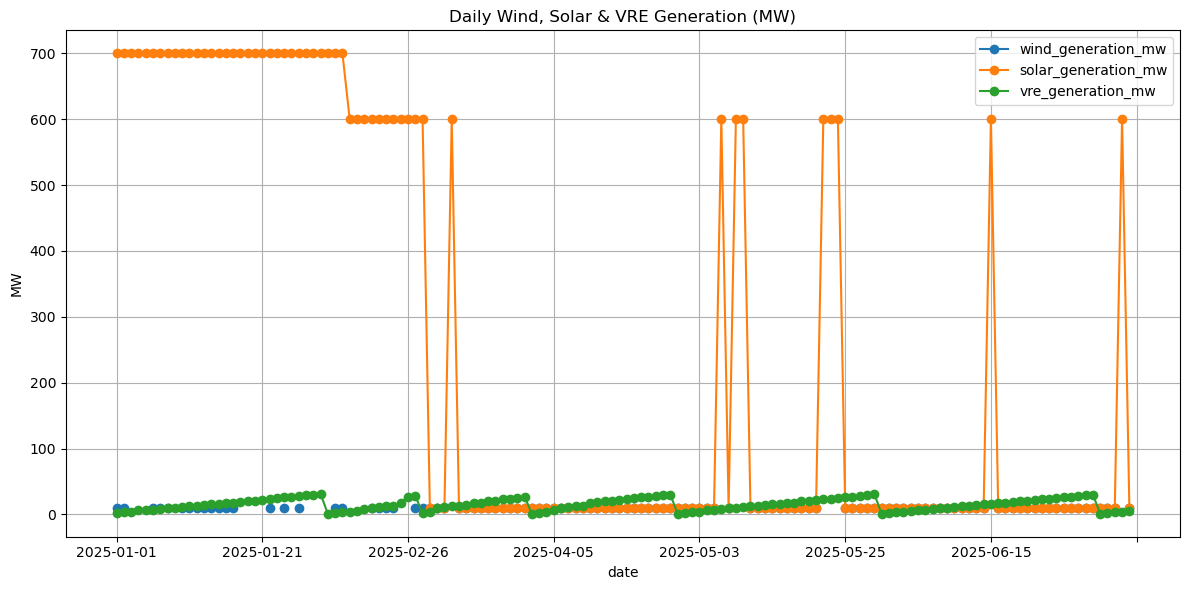

In [25]:
import matplotlib.pyplot as plt

df.plot(x='date', y=['wind_generation_mw', 'solar_generation_mw', 'vre_generation_mw'], marker='o', figsize=(12, 6))
plt.title("Daily Wind, Solar & VRE Generation (MW)")
plt.ylabel("MW")
plt.grid(True)
plt.tight_layout()
plt.show()


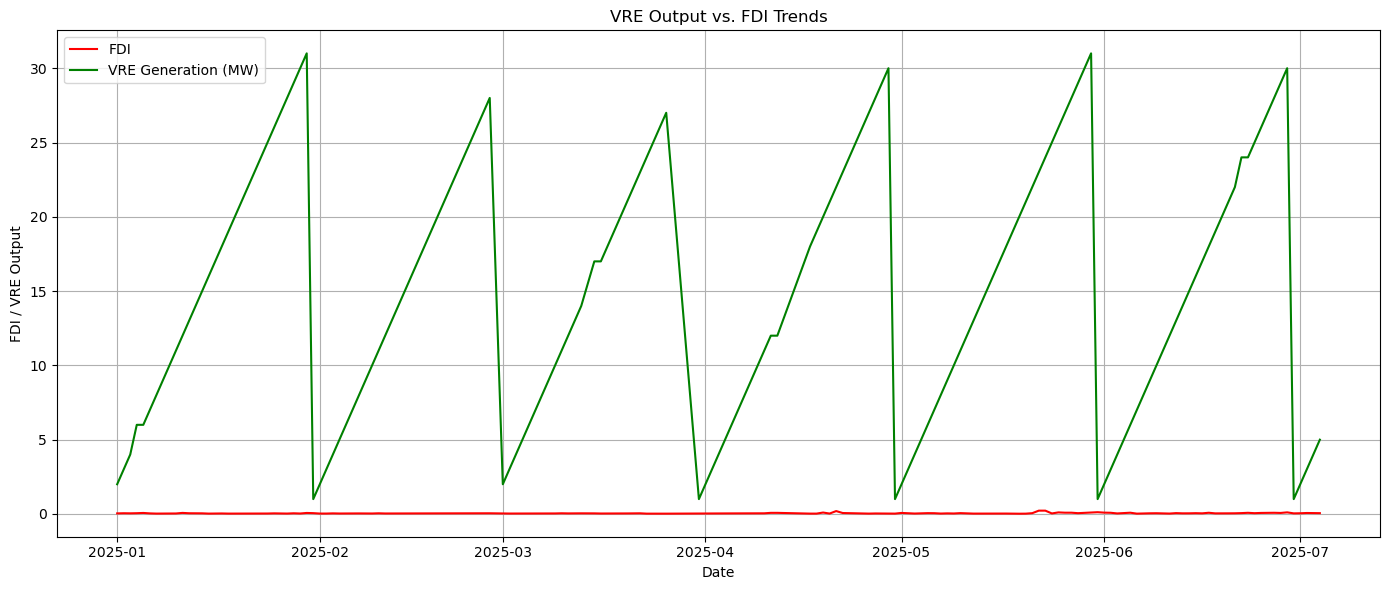

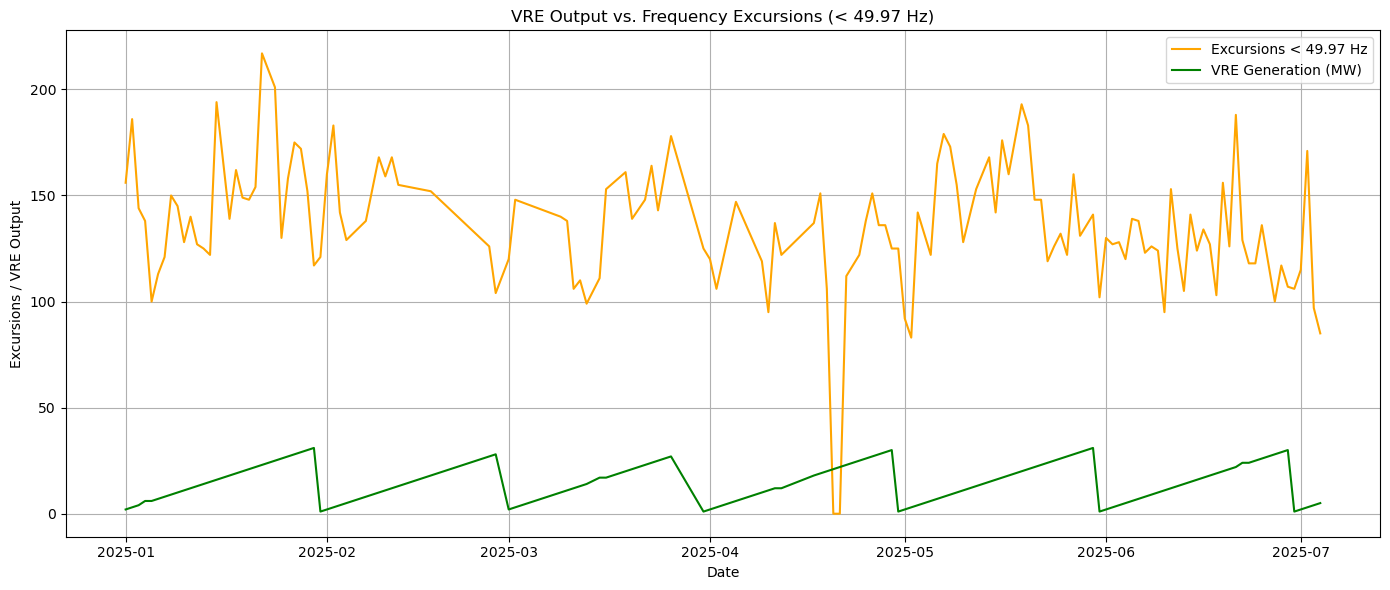

✅ Merged data saved to 'merged_frequency_vre_profile.csv'.


In [26]:
# ----------------------------------------------
# 📌 1. Import libraries
# ----------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------
# 📌 2. Load frequency dataset
# ----------------------------------------------
# Replace with your cleaned frequency CSV
df_freq = pd.read_csv('cleaned_frequency_report.csv')

# Parse Date column
df_freq['Date'] = pd.to_datetime(df_freq['Date'], dayfirst=True, errors='coerce')

# ----------------------------------------------
# 📌 3. Load cleaned VRE dataset
# ----------------------------------------------
df_vre = pd.read_csv('vre_summary.csv')
df_vre['date'] = pd.to_datetime(df_vre['date'], errors='coerce')

# ----------------------------------------------
# 📌 4. Merge datasets on date
# ----------------------------------------------
df_merged = pd.merge(
    df_freq, 
    df_vre, 
    left_on='Date', 
    right_on='date', 
    how='inner'  # Or 'outer' if you want all dates
)

# Drop duplicate 'date' column if exists
df_merged.drop(columns=['date'], inplace=True)

# ----------------------------------------------
# 📌 5. Handle missing values in merged data
# ----------------------------------------------
# Fill numeric columns with ffill/bfill if needed
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
df_merged[numeric_cols] = df_merged[numeric_cols].fillna(method='ffill').fillna(method='bfill')

# ----------------------------------------------
# 📌 6. Plot VRE vs. FDI
# ----------------------------------------------
plt.figure(figsize=(14, 6))
plt.plot(df_merged['Date'], df_merged['FDI'], label='FDI', color='red')
plt.plot(df_merged['Date'], df_merged['vre_generation_mw'], label='VRE Generation (MW)', color='green')
plt.title('VRE Output vs. FDI Trends')
plt.xlabel('Date')
plt.ylabel('FDI / VRE Output')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------------------------
# 📌 7. Plot VRE vs. Frequency Excursions
# ----------------------------------------------
plt.figure(figsize=(14, 6))
plt.plot(df_merged['Date'], df_merged['Excursions < 49.97 Hz'], label='Excursions < 49.97 Hz', color='orange')
plt.plot(df_merged['Date'], df_merged['vre_generation_mw'], label='VRE Generation (MW)', color='green')
plt.title('VRE Output vs. Frequency Excursions (< 49.97 Hz)')
plt.xlabel('Date')
plt.ylabel('Excursions / VRE Output')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------------------------
# 📌 8. Optional: Save merged dataset
# ----------------------------------------------
df_merged.to_csv('merged_frequency_vre_profile.csv', index=False)
print("✅ Merged data saved to 'merged_frequency_vre_profile.csv'.")


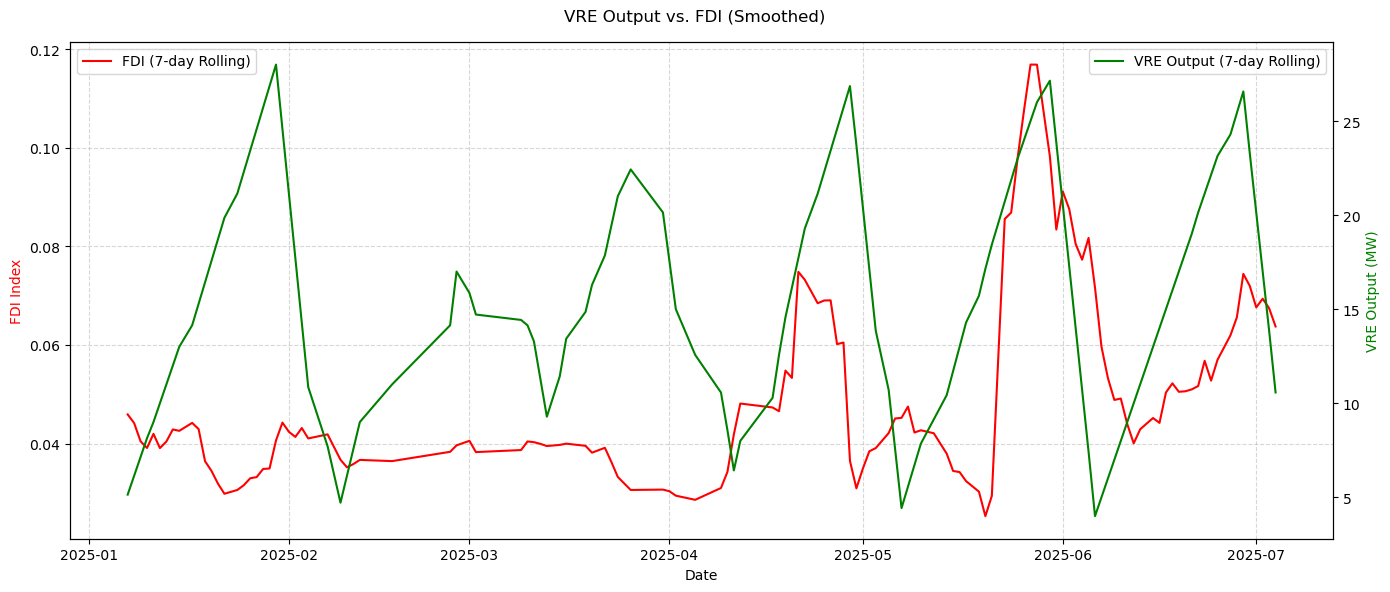

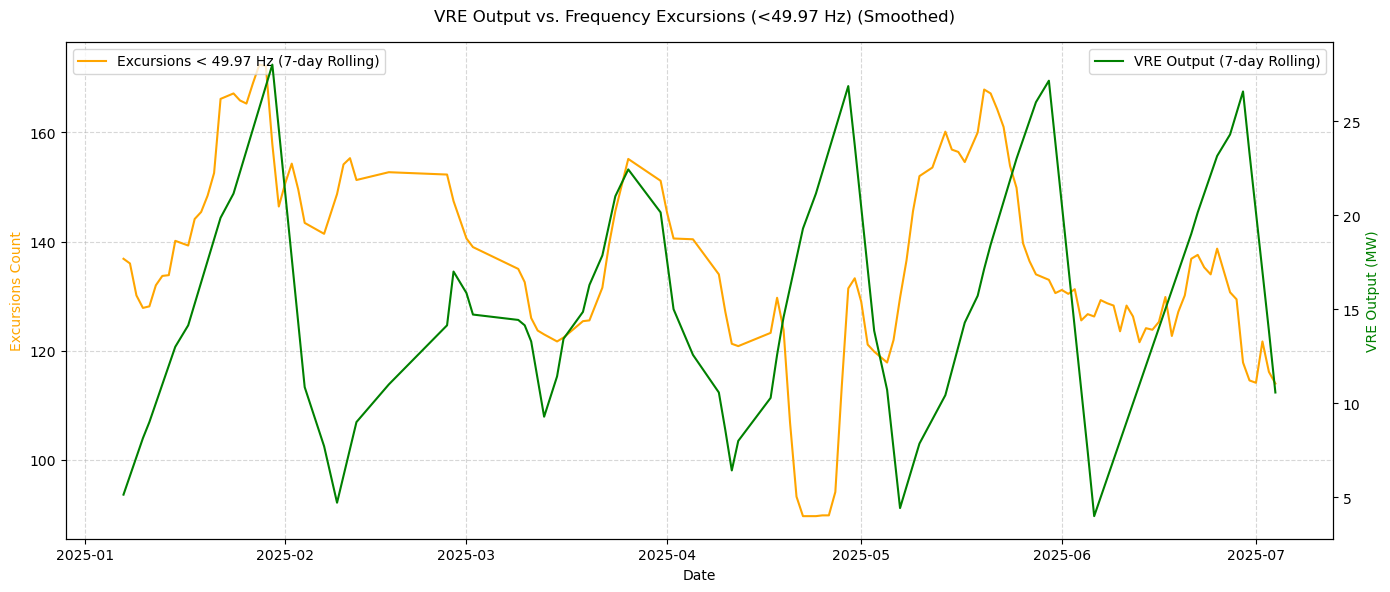

In [30]:
# ----------------------------------------------------------
# Add rolling averages
# ----------------------------------------------------------
df_merged['VRE_Roll'] = df_merged['vre_generation_mw'].rolling(window=7).mean()
df_merged['FDI_Roll'] = df_merged['FDI'].rolling(window=7).mean()
df_merged['Excursions_49.97_Roll'] = df_merged['Excursions < 49.97 Hz'].rolling(window=7).mean()

import matplotlib.pyplot as plt

# ----------------------------------------------------------
# VRE vs. FDI (Smoothed) with grid lines
# ----------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(df_merged['Date'], df_merged['FDI_Roll'], label='FDI (7-day Rolling)', color='red')
ax2 = ax1.twinx()
ax2.plot(df_merged['Date'], df_merged['VRE_Roll'], label='VRE Output (7-day Rolling)', color='green')

# Labels
ax1.set_xlabel('Date')
ax1.set_ylabel('FDI Index', color='red')
ax2.set_ylabel('VRE Output (MW)', color='green')
fig.suptitle('VRE Output vs. FDI (Smoothed)')

# Grid lines on both axes
ax1.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
ax2.grid(False)  # Avoid duplicate grid

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# VRE vs. Frequency Excursions (Smoothed) with grid lines
# ----------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(df_merged['Date'], df_merged['Excursions_49.97_Roll'],
         label='Excursions < 49.97 Hz (7-day Rolling)', color='orange')
ax2 = ax1.twinx()
ax2.plot(df_merged['Date'], df_merged['VRE_Roll'],
         label='VRE Output (7-day Rolling)', color='green')

# Labels
ax1.set_xlabel('Date')
ax1.set_ylabel('Excursions Count', color='orange')
ax2.set_ylabel('VRE Output (MW)', color='green')
fig.suptitle('VRE Output vs. Frequency Excursions (<49.97 Hz) (Smoothed)')

# Grid lines
ax1.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
ax2.grid(False)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()



In [29]:
print("Correlation (VRE vs. FDI):", df_merged['VRE_Roll'].corr(df_merged['FDI_Roll']))
print("Correlation (VRE vs. Excursions):", df_merged['VRE_Roll'].corr(df_merged['Excursions_49.97_Roll']))
fig.savefig('VRE_vs_FDI.png', dpi=300)


Correlation (VRE vs. FDI): 0.3093548209579583
Correlation (VRE vs. Excursions): 0.09296426874911091


📊 Correlation Matrix:
                       VRE_Roll  FDI_Roll  Excursions_49.97_Roll  \
VRE_Roll               1.000000  0.309355               0.092964   
FDI_Roll               0.309355  1.000000              -0.373547   
Excursions_49.97_Roll  0.092964 -0.373547               1.000000   
Average Frequency      0.111683  0.157395               0.042122   
Max Inst Freq          0.149698  0.158705              -0.049537   
Min Inst Freq          0.254310 -0.169299               0.325117   
Mileage                0.100962  0.147074               0.322362   

                       Average Frequency  Max Inst Freq  Min Inst Freq  \
VRE_Roll                        0.111683       0.149698       0.254310   
FDI_Roll                        0.157395       0.158705      -0.169299   
Excursions_49.97_Roll           0.042122      -0.049537       0.325117   
Average Frequency               1.000000       0.365889       0.322899   
Max Inst Freq                   0.365889       1.000000       0

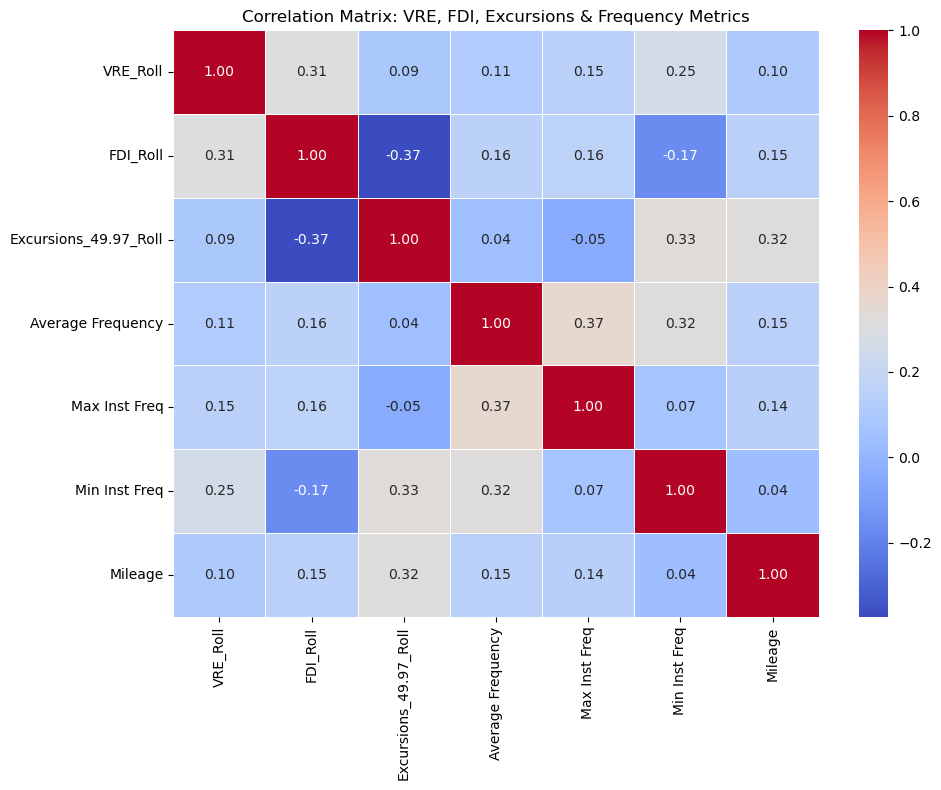

In [31]:
# ----------------------------------------------------------
# ✅ Select relevant numeric columns for correlation
# ----------------------------------------------------------
corr_cols = [
    'VRE_Roll',
    'FDI_Roll',
    'Excursions_49.97_Roll',
    'Average Frequency',
    'Max Inst Freq',
    'Min Inst Freq',
    'Mileage'  # or any other metric you have
]

# Filter to only columns that exist
corr_cols = [col for col in corr_cols if col in df_merged.columns]

# ----------------------------------------------------------
# ✅ Calculate correlation matrix
# ----------------------------------------------------------
corr_matrix = df_merged[corr_cols].corr()

print("📊 Correlation Matrix:")
print(corr_matrix)

# ----------------------------------------------------------
# ✅ Plot it as a heatmap
# ----------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5
)
plt.title('Correlation Matrix: VRE, FDI, Excursions & Frequency Metrics')
plt.tight_layout()
plt.show()



In [32]:
# ----------------------------------------------------------
# Example: Predict next-day FDI
# ----------------------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature: VRE today
# Target: FDI tomorrow
df_merged['FDI_next'] = df_merged['FDI_Roll'].shift(-1)

# Drop NaN row from shift
data = df_merged.dropna(subset=['FDI_Roll', 'VRE_Roll', 'FDI_next'])

X = data[['VRE_Roll']]
y = data['FDI_next']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Predict next day's FDI
print("Prediction Example:")
print(f"VRE Today: {X_test.iloc[-1].values[0]:.2f} MW => Predicted FDI Tomorrow: {y_pred[-1]:.4f}")


Mean Squared Error: 0.0001
Prediction Example:
VRE Today: 13.86 MW => Predicted FDI Tomorrow: 0.0464


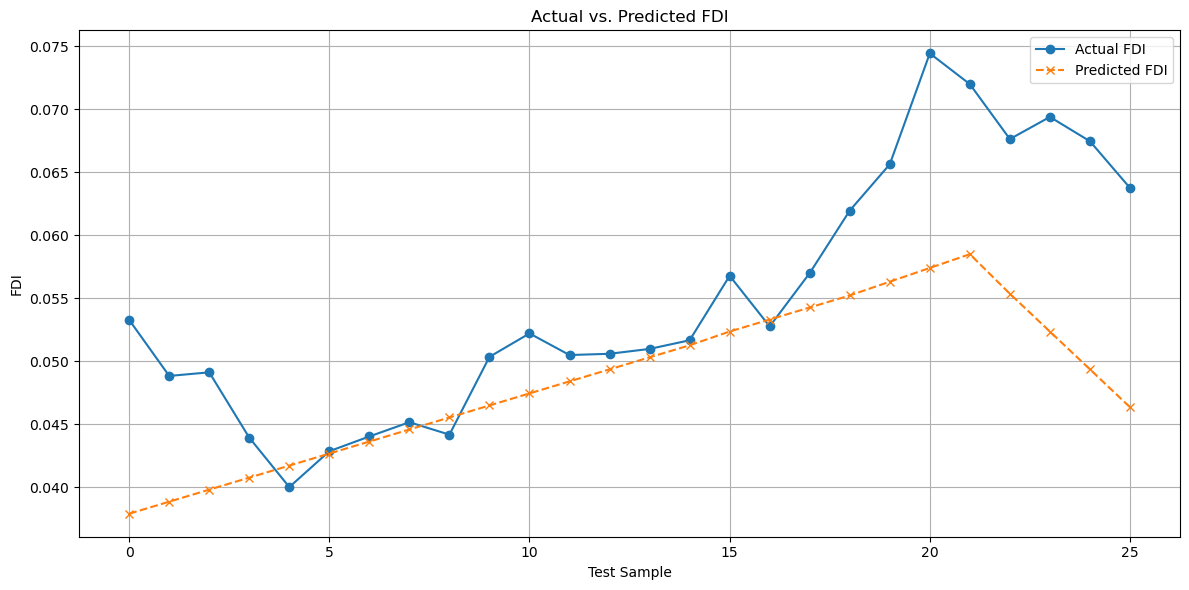

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual FDI', marker='o')
plt.plot(y_pred, label='Predicted FDI', marker='x', linestyle='--')
plt.title('Actual vs. Predicted FDI')
plt.xlabel('Test Sample')
plt.ylabel('FDI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


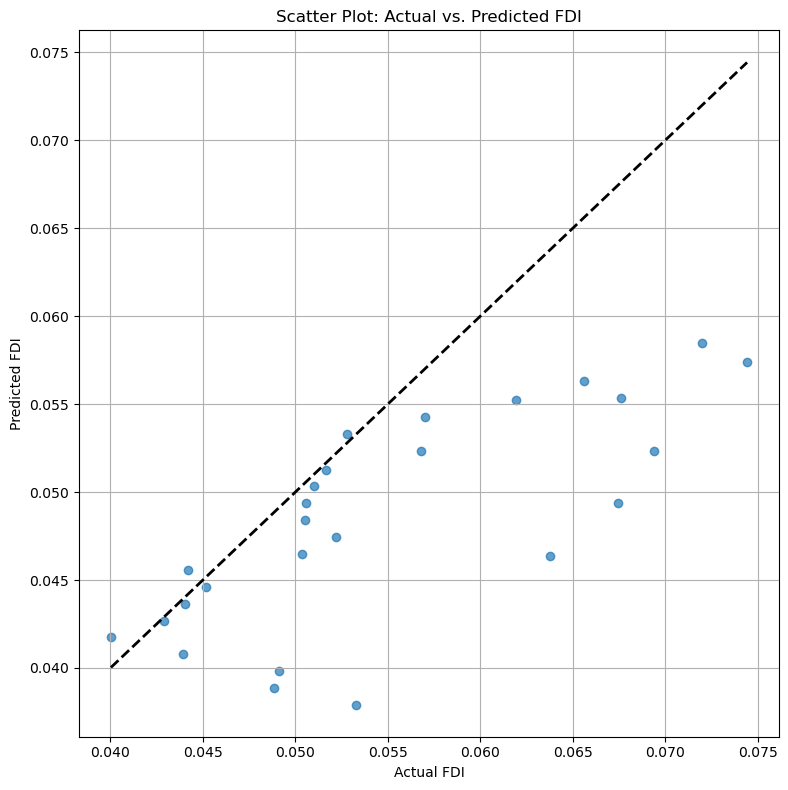

In [34]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Scatter Plot: Actual vs. Predicted FDI')
plt.xlabel('Actual FDI')
plt.ylabel('Predicted FDI')
plt.grid(True)
plt.tight_layout()
plt.show()


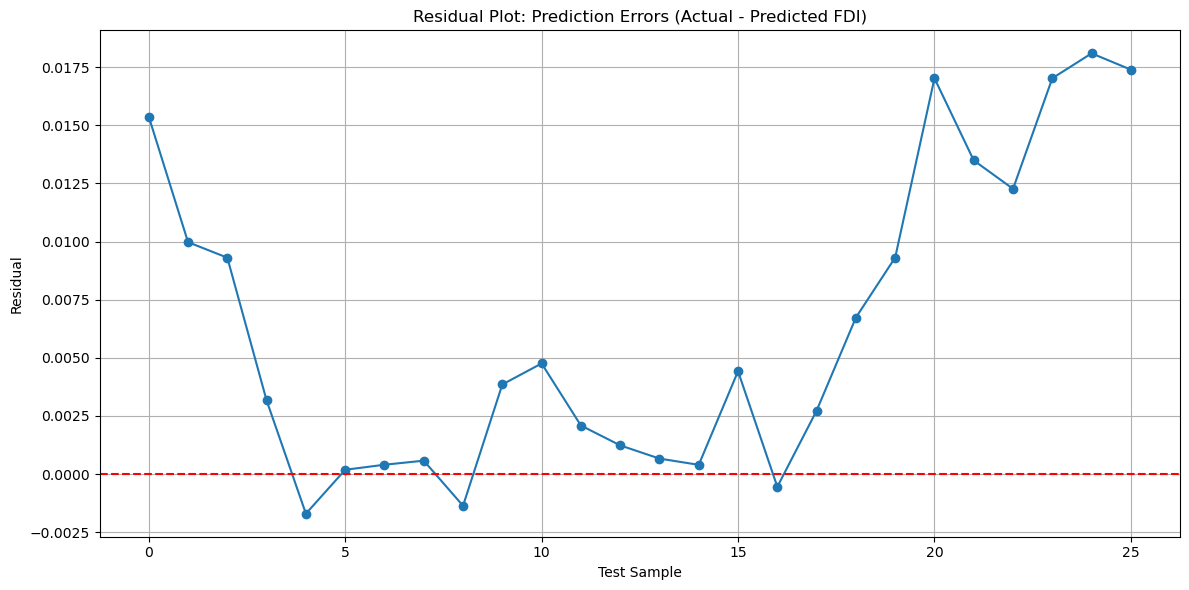

In [35]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.plot(residuals.reset_index(drop=True), marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Prediction Errors (Actual - Predicted FDI)')
plt.xlabel('Test Sample')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0001
R² Score: 0.1040


In [7]:
print(merged_df.head())


Empty DataFrame
Columns: [date, average frequency, max inst freq, max inst time, min inst freq, min inst time, 15-min max freq, 15-min max time, 15-min min freq, 15-min min time, excursions < 49.97 hz, excursions < 50.00 hz, fdi, std dev, mileage, wind_generation_mw, solar_generation_mw, vre_generation_mw]
Index: []


In [8]:
print(freq_df.columns.tolist())


['date', 'average frequency', 'max inst freq', 'max inst time', 'min inst freq', 'min inst time', '15-min max freq', '15-min max time', '15-min min freq', '15-min min time', 'excursions < 49.97 hz', 'excursions < 50.00 hz', 'fdi', 'std dev', 'mileage']


In [20]:
simulation_input = merged_df[['date', 'avg_freq', 'fdi', 'wind_generation_mw', 'solar_generation_mw', 'vre_generation_mw']]


KeyError: "['avg_freq'] not in index"

In [11]:
import pandas as pd

# ✅ Step 1: Load your local CSV files
freq_df = pd.read_csv("cleaned_frequency_report.csv")
vre_df = pd.read_csv("vre_summary_30days.csv")

# ✅ Step 2: Normalize column names
freq_df.columns = freq_df.columns.str.strip().str.lower()
vre_df.columns = vre_df.columns.str.strip().str.lower()

# ✅ Step 3: Convert to datetime format (and keep full datetime64[ns])
freq_df['date'] = pd.to_datetime(freq_df['date'], dayfirst=True, errors='coerce')
vre_df['date'] = pd.to_datetime(vre_df['date'], dayfirst=True, errors='coerce')

# ✅ Step 4: Merge both on 'date'
merged_df = pd.merge(freq_df, vre_df, on='date', how='inner')

# ✅ Step 5: Save merged file if you want
merged_df.to_csv("merged_freq_vre.csv", index=False)

# ✅ Step 6: Extract simulation input (check exact column names!)
simulation_input = merged_df[[
    'date',
    'average frequency',
    'fdi',
    'wind_generation_mw',
    'solar_generation_mw',
    'vre_generation_mw'
]]

# ✅ Step 7: Save simulation input for MATLAB
simulation_input.to_csv("simulation_input_matlab.csv", index=False)

# ✅ Step 8: Optional - view it
simulation_input.head()


Empty DataFrame
Columns: [date, average frequency, fdi, wind_generation_mw, solar_generation_mw, vre_generation_mw]
Index: []

In [12]:
print(merged_df.columns.tolist())


['date', 'average frequency', 'max inst freq', 'max inst time', 'min inst freq', 'min inst time', '15-min max freq', '15-min max time', '15-min min freq', '15-min min time', 'excursions < 49.97 hz', 'excursions < 50.00 hz', 'fdi', 'std dev', 'mileage', 'wind_generation_mw', 'solar_generation_mw', 'vre_generation_mw']


In [13]:
['date', 'average frequency', 'fdi', 'wind_generation_mw', 'solar_generation_mw', 'vre_generation_mw']
# ✅ Save simulation input as CSV
simulation_input = merged_df[[
    'date',
    'average frequency',
    'fdi',
    'wind_generation_mw',
    'solar_generation_mw',
    'vre_generation_mw'
]]

simulation_input.to_csv("simulation_input_matlab.csv", index=False)
print("✅ Simulation input saved to simulation_input_matlab.csv")
simulation_input.head()



✅ Simulation input saved to simulation_input_matlab.csv


Empty DataFrame
Columns: [date, average frequency, fdi, wind_generation_mw, solar_generation_mw, vre_generation_mw]
Index: []

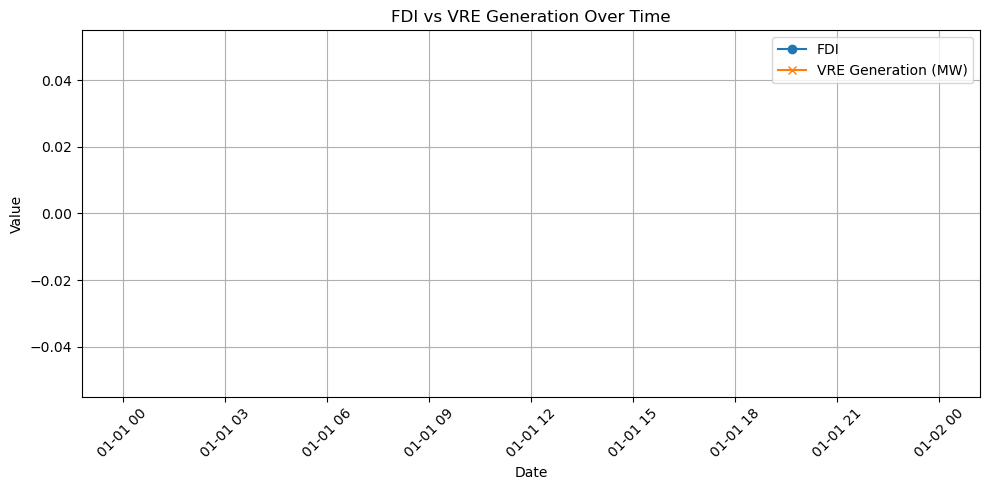

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(simulation_input['date'], simulation_input['fdi'], label='FDI', marker='o')
plt.plot(simulation_input['date'], simulation_input['vre_generation_mw'], label='VRE Generation (MW)', marker='x')
plt.title("FDI vs VRE Generation Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
simulation_input['fdi_vre_combo'] = simulation_input['fdi'] * simulation_input['vre_generation_mw']
top5 = simulation_input.sort_values(by='fdi_vre_combo', ascending=False).head(5)
top5


Empty DataFrame
Columns: [date, average frequency, fdi, wind_generation_mw, solar_generation_mw, vre_generation_mw, fdi_vre_combo]
Index: []

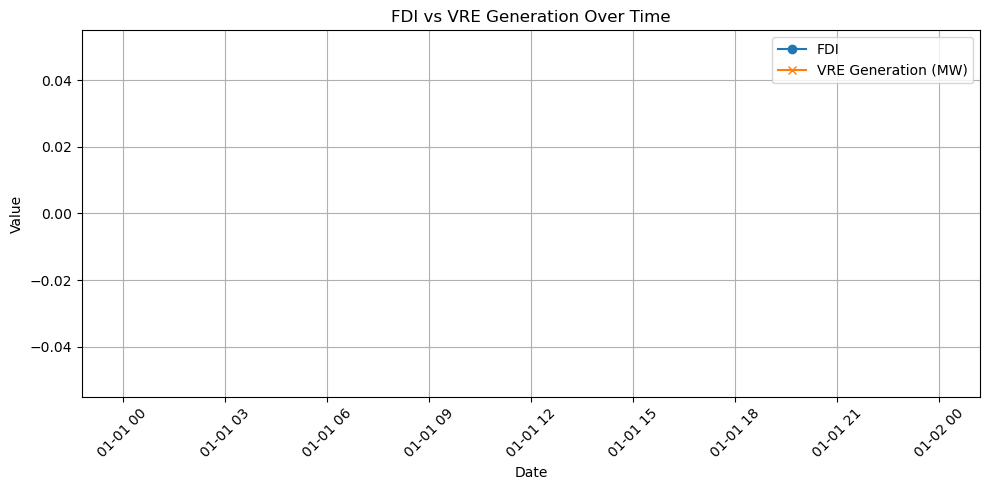

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv("simulation_input_matlab.csv")

# ✅ Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['fdi'], label='FDI', marker='o')
plt.plot(df['date'], df['vre_generation_mw'], label='VRE Generation (MW)', marker='x')
plt.title("FDI vs VRE Generation Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
print(df[['date', 'fdi', 'vre_generation_mw']].head())


Empty DataFrame
Columns: [date, fdi, vre_generation_mw]
Index: []


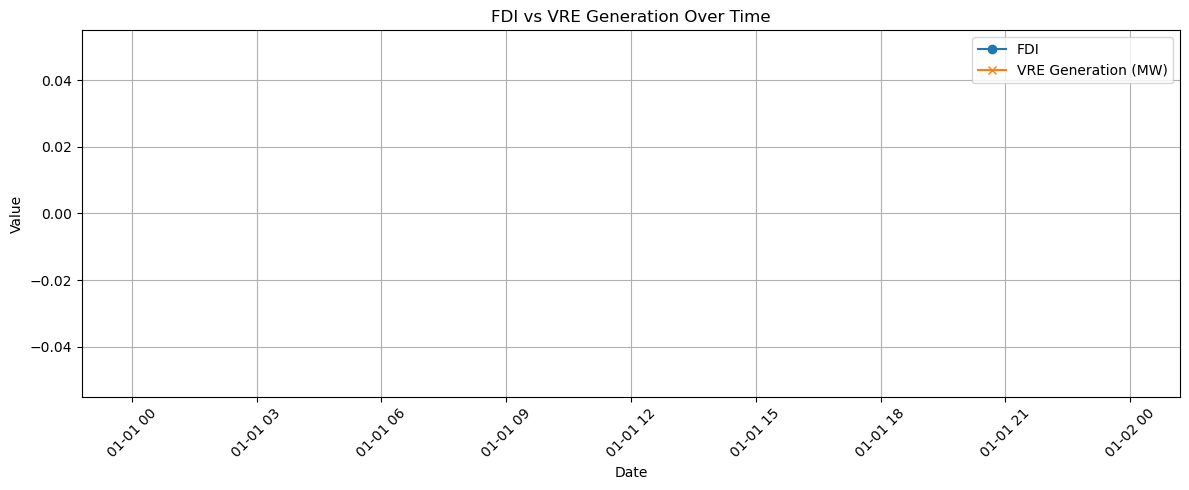

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Step 1: Load the simulation input file
df = pd.read_csv("simulation_input_matlab.csv")

# ✅ Step 2: Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# ✅ Step 3: Drop rows with missing values in 'fdi' or 'vre_generation_mw'
df = df.dropna(subset=['fdi', 'vre_generation_mw'])

# ✅ Step 4: Plot FDI vs VRE Generation
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['fdi'], label='FDI', marker='o')
plt.plot(df['date'], df['vre_generation_mw'], label='VRE Generation (MW)', marker='x')
plt.title("FDI vs VRE Generation Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
df = pd.read_csv("simulation_input_matlab.csv")
print(df.dtypes)
print(df.head(10))


date                   object
average frequency      object
fdi                    object
wind_generation_mw     object
solar_generation_mw    object
vre_generation_mw      object
dtype: object
Empty DataFrame
Columns: [date, average frequency, fdi, wind_generation_mw, solar_generation_mw, vre_generation_mw]
Index: []


After conversion, first few rows:
 Empty DataFrame
Columns: [date, fdi, vre_generation_mw]
Index: []
📊 Total valid rows after cleaning: 0


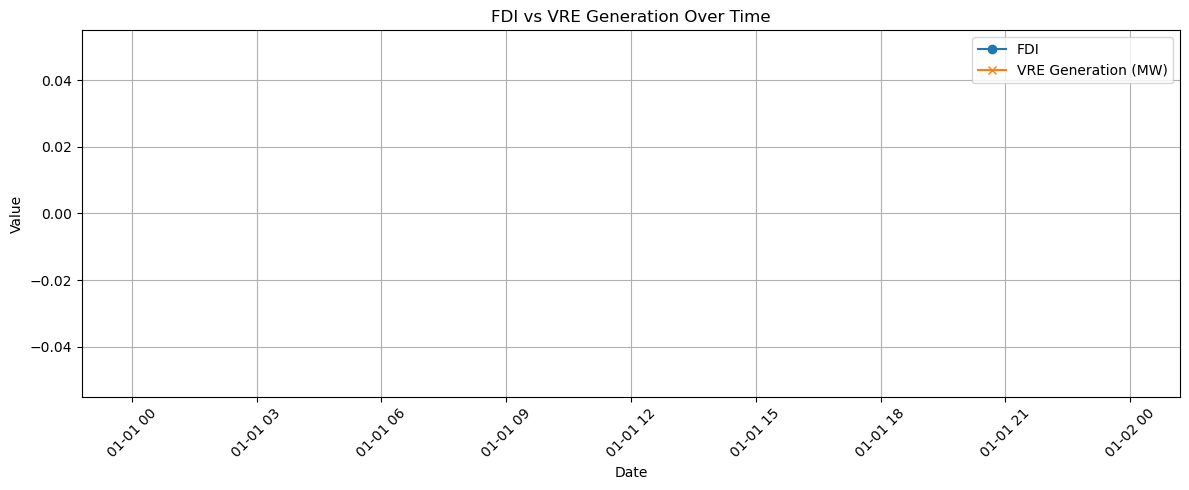

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("simulation_input_matlab.csv")

# Check and fix date column
df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)
print("After conversion, first few rows:\n", df[['date', 'fdi', 'vre_generation_mw']].head())

# Drop rows with missing data
df = df.dropna(subset=['date', 'fdi', 'vre_generation_mw'])

# Confirm something remains
print("📊 Total valid rows after cleaning:", len(df))

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['fdi'], label='FDI', marker='o')
plt.plot(df['date'], df['vre_generation_mw'], label='VRE Generation (MW)', marker='x')
plt.title("FDI vs VRE Generation Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Load original datasets
freq_df = pd.read_csv("cleaned_frequency_report.csv")
vre_df = pd.read_csv("vre_summary_30days.csv")

# Normalize column names
freq_df.columns = freq_df.columns.str.strip().str.lower()
vre_df.columns = vre_df.columns.str.strip().str.lower()

# Parse date columns
freq_df['date'] = pd.to_datetime(freq_df['date'], dayfirst=True, errors='coerce')
vre_df['date'] = pd.to_datetime(vre_df['date'], dayfirst=True, errors='coerce')

# Merge them again (ensure both have matching dates)
merged_df = pd.merge(freq_df, vre_df, on='date', how='inner')

# Save merged result
merged_df.to_csv("merged_freq_vre.csv", index=False)


In [22]:
simulation_input = merged_df[[
    'date',
    'average frequency',
    'fdi',
    'wind_generation_mw',
    'solar_generation_mw',
    'vre_generation_mw'
]]

simulation_input.to_csv("simulation_input_matlab.csv", index=False)
print("✅ Simulation input recreated.")


✅ Simulation input recreated.


In [23]:
print(simulation_input.dtypes)
simulation_input.head()


date                   datetime64[ns]
average frequency             float64
fdi                           float64
wind_generation_mw              int64
solar_generation_mw             int64
vre_generation_mw               int64
dtype: object


Empty DataFrame
Columns: [date, average frequency, fdi, wind_generation_mw, solar_generation_mw, vre_generation_mw]
Index: []

In [24]:
print("Freq dates:", freq_df['date'].min(), "to", freq_df['date'].max())
print("VRE dates:", vre_df['date'].min(), "to", vre_df['date'].max())


Freq dates: NaT to NaT
VRE dates: 2025-05-13 00:00:00 to 2025-06-12 00:00:00


In [25]:
print(freq_df['date'].head(10))


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: date, dtype: datetime64[ns]


In [26]:
df_raw = pd.read_csv("cleaned_frequency_report.csv")
print(df_raw.columns)
print(df_raw.iloc[:, 0].head(10))  # Assuming 'date' is the first column


Index(['Date', 'Average Frequency', 'Max Inst Freq', 'Max Inst Time',
       'Min Inst Freq', 'Min Inst Time', '15-min Max Freq', '15-min Max Time',
       '15-min Min Freq', '15-min Min Time', 'Excursions < 49.97 Hz',
       'Excursions < 50.00 Hz', 'FDI', 'Std Dev', 'Mileage'],
      dtype='object')
0                    13 MAy
1    Frequency 01.06.25_341
2    Frequency 02.06.25_278
3    Frequency 03.06.25_140
4    Frequency 04.06.25_142
5    Frequency 05.06.25_750
6    Frequency 06.06.25_141
7    Frequency 07.06.25_532
8    Frequency 08.06.25_135
9    Frequency 09.06.25_952
Name: Date, dtype: object


In [27]:
import pandas as pd

# Step 1: Load the raw data
freq_df = pd.read_csv("cleaned_frequency_report.csv")

# Step 2: Strip leading/trailing spaces and lowercase columns
freq_df.columns = freq_df.columns.str.strip().str.lower()

# Step 3: Fix the 'date' column
def extract_date(x):
    import re
    match = re.search(r'\d{2}\.\d{2}\.\d{2}', x)
    if match:
        return pd.to_datetime(match.group(), format="%d.%m.%y", errors='coerce')
    try:
        return pd.to_datetime(x, dayfirst=True, errors='coerce')  # e.g., '13 May'
    except:
        return pd.NaT

freq_df['date'] = freq_df['date'].apply(extract_date)

# ✅ Sanity check
print(freq_df[['date']].head(10))
print("📅 Parsed date range:", freq_df['date'].min(), "to", freq_df['date'].max())


        date
0        NaT
1 2025-06-01
2 2025-06-02
3 2025-06-03
4 2025-06-04
5 2025-06-05
6 2025-06-06
7 2025-06-07
8 2025-06-08
9 2025-06-09
📅 Parsed date range: 2025-05-14 00:00:00 to 2025-06-13 00:00:00


In [28]:
import pandas as pd
import re

# Load frequency data
freq_df = pd.read_csv("cleaned_frequency_report.csv")
freq_df.columns = freq_df.columns.str.strip().str.lower()

# Fix date parsing
def extract_date(x):
    match = re.search(r'\d{2}\.\d{2}\.\d{2}', x)
    if match:
        return pd.to_datetime(match.group(), format="%d.%m.%y", errors='coerce')
    try:
        return pd.to_datetime(x + " 2025", format="%d %b %Y", errors='coerce')
    except:
        return pd.NaT

freq_df['date'] = freq_df['date'].apply(extract_date)

# Check again
print(freq_df['date'].head())
print("✅ Date range:", freq_df['date'].min(), "to", freq_df['date'].max())


0   2025-05-13
1   2025-06-01
2   2025-06-02
3   2025-06-03
4   2025-06-04
Name: date, dtype: datetime64[ns]
✅ Date range: 2025-05-13 00:00:00 to 2025-06-13 00:00:00


In [29]:
vre_df = pd.read_csv("vre_summary_30days.csv")
vre_df.columns = vre_df.columns.str.strip().str.lower()
vre_df['date'] = pd.to_datetime(vre_df['date'], dayfirst=True, errors='coerce')

merged_df = pd.merge(freq_df, vre_df, on='date', how='inner')
merged_df.to_csv("merged_freq_vre.csv", index=False)


In [30]:
simulation_input = merged_df[[
    'date',
    'average frequency',
    'fdi',
    'wind_generation_mw',
    'solar_generation_mw',
    'vre_generation_mw'
]]
simulation_input.to_csv("simulation_input_matlab.csv", index=False)


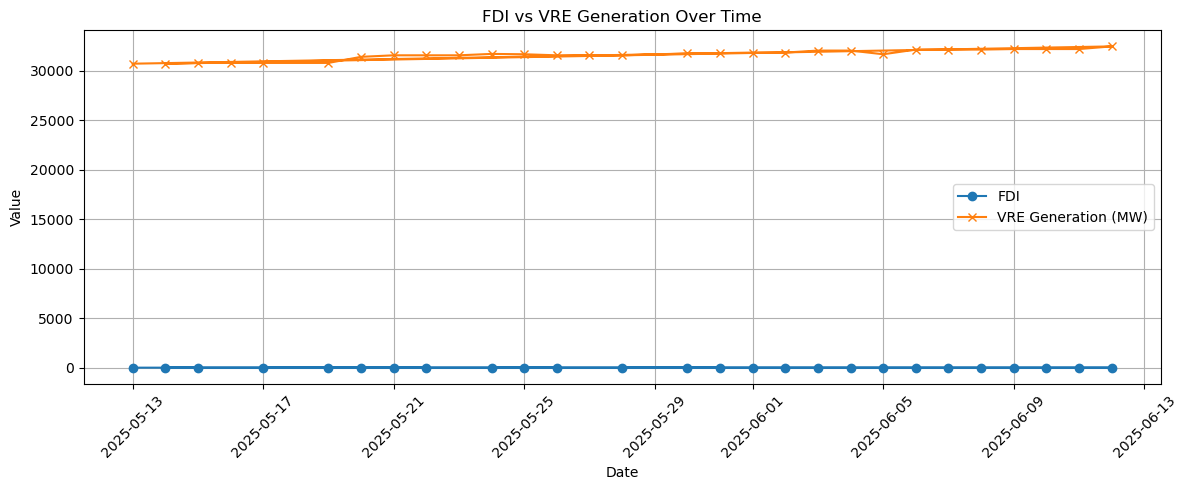

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(simulation_input['date'], simulation_input['fdi'], label='FDI', marker='o')
plt.plot(simulation_input['date'], simulation_input['vre_generation_mw'], label='VRE Generation (MW)', marker='x')
plt.title("FDI vs VRE Generation Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


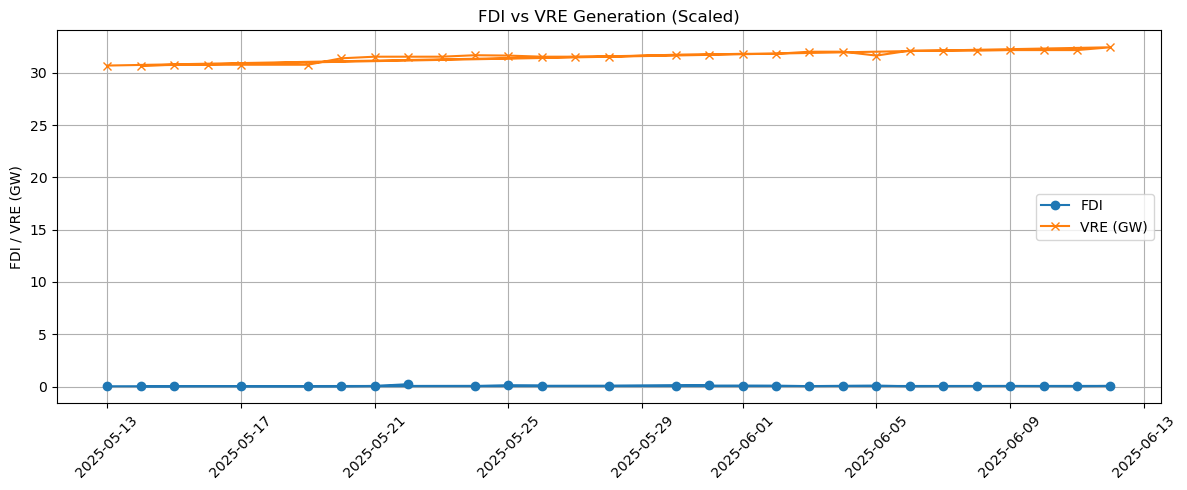

In [32]:
plt.figure(figsize=(12, 5))
plt.plot(simulation_input['date'], simulation_input['fdi'], label='FDI', marker='o')
plt.plot(simulation_input['date'], simulation_input['vre_generation_mw']/1000, label='VRE (GW)', marker='x')
plt.title("FDI vs VRE Generation (Scaled)")
plt.ylabel("FDI / VRE (GW)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


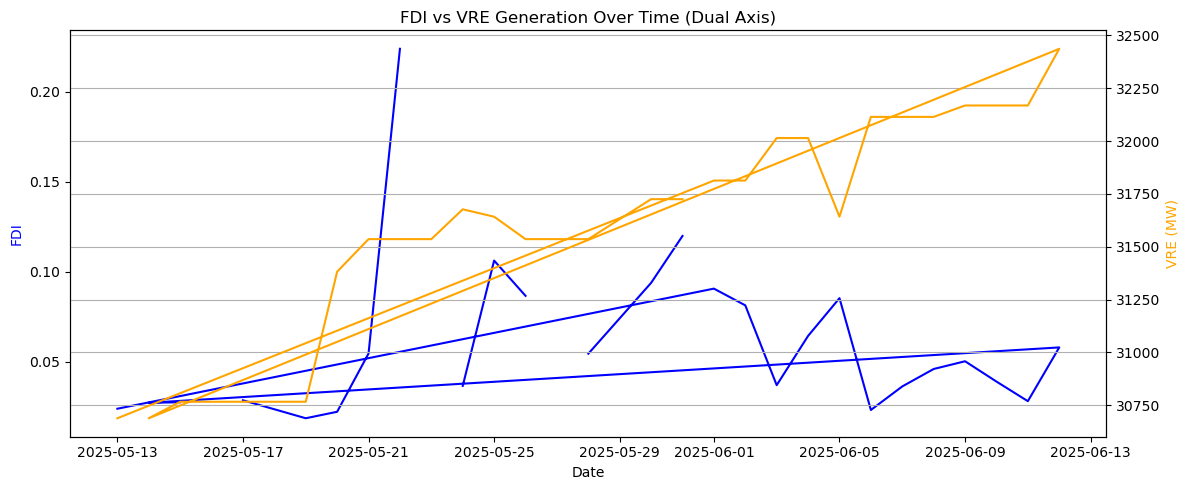

In [33]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax2 = ax1.twinx()
ax1.plot(simulation_input['date'], simulation_input['fdi'], 'b-', label='FDI')
ax2.plot(simulation_input['date'], simulation_input['vre_generation_mw'], 'orange', label='VRE Generation (MW)')

ax1.set_xlabel('Date')
ax1.set_ylabel('FDI', color='b')
ax2.set_ylabel('VRE (MW)', color='orange')
plt.title("FDI vs VRE Generation Over Time (Dual Axis)")
fig.tight_layout()
plt.grid(True)
plt.show()


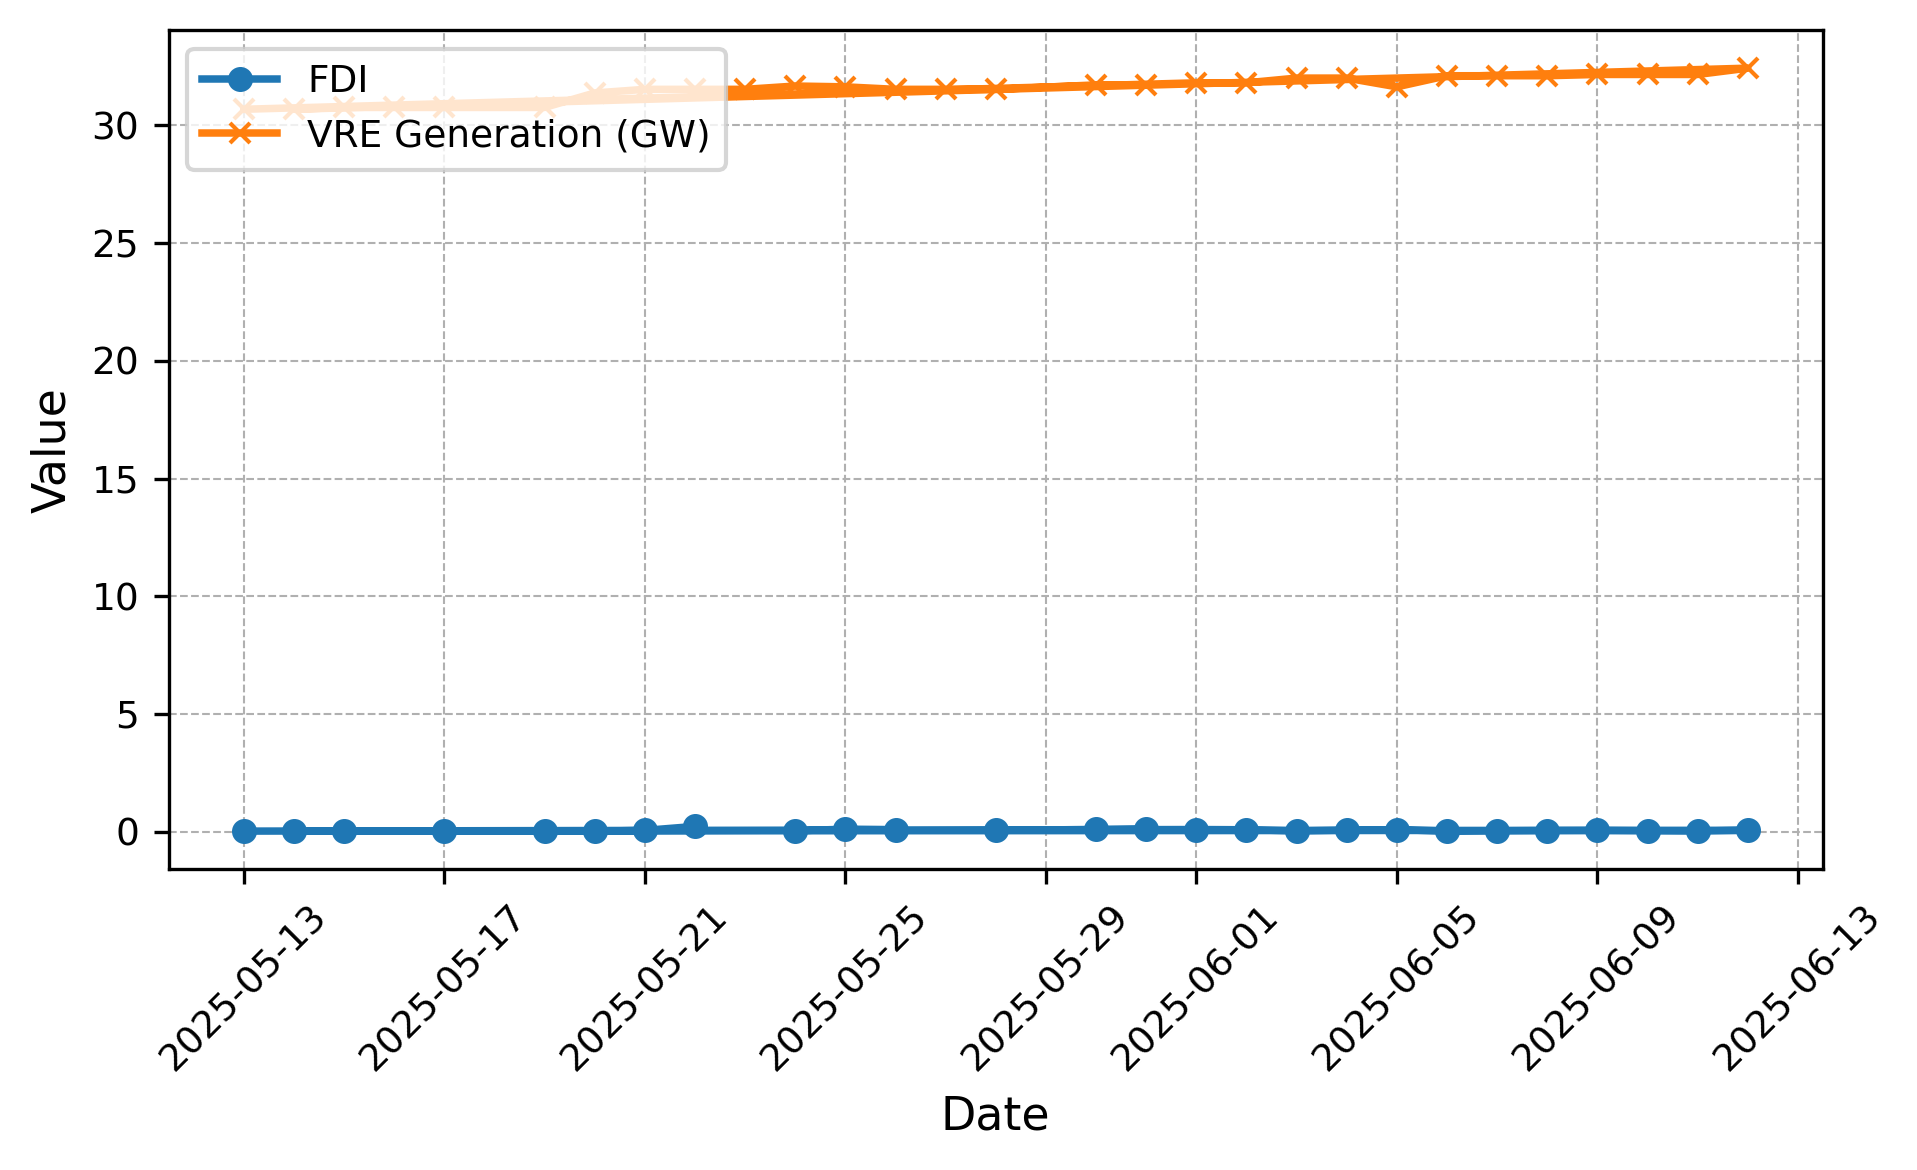

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(6.5, 4), dpi=300)  # IEEE column width ~6.5in

plt.plot(simulation_input['date'], simulation_input['fdi'], label='FDI', 
         marker='o', linewidth=1.8, markersize=5)
plt.plot(simulation_input['date'], simulation_input['vre_generation_mw'] / 1000, 
         label='VRE Generation (GW)', marker='x', linewidth=1.8, markersize=5)

plt.xlabel("Date", fontsize=11)
plt.ylabel("Value", fontsize=11)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', fontsize=9)
plt.tight_layout()
plt.savefig("FDI_vs_VRE_Q1_ready.png", dpi=300)
plt.show()


In [36]:
import matplotlib.dates as mdates

# Format x-axis dates
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # show weekly ticks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format as 'YYYY-MM-DD'
fig.autofmt_xdate(rotation=45)  # rotate and align


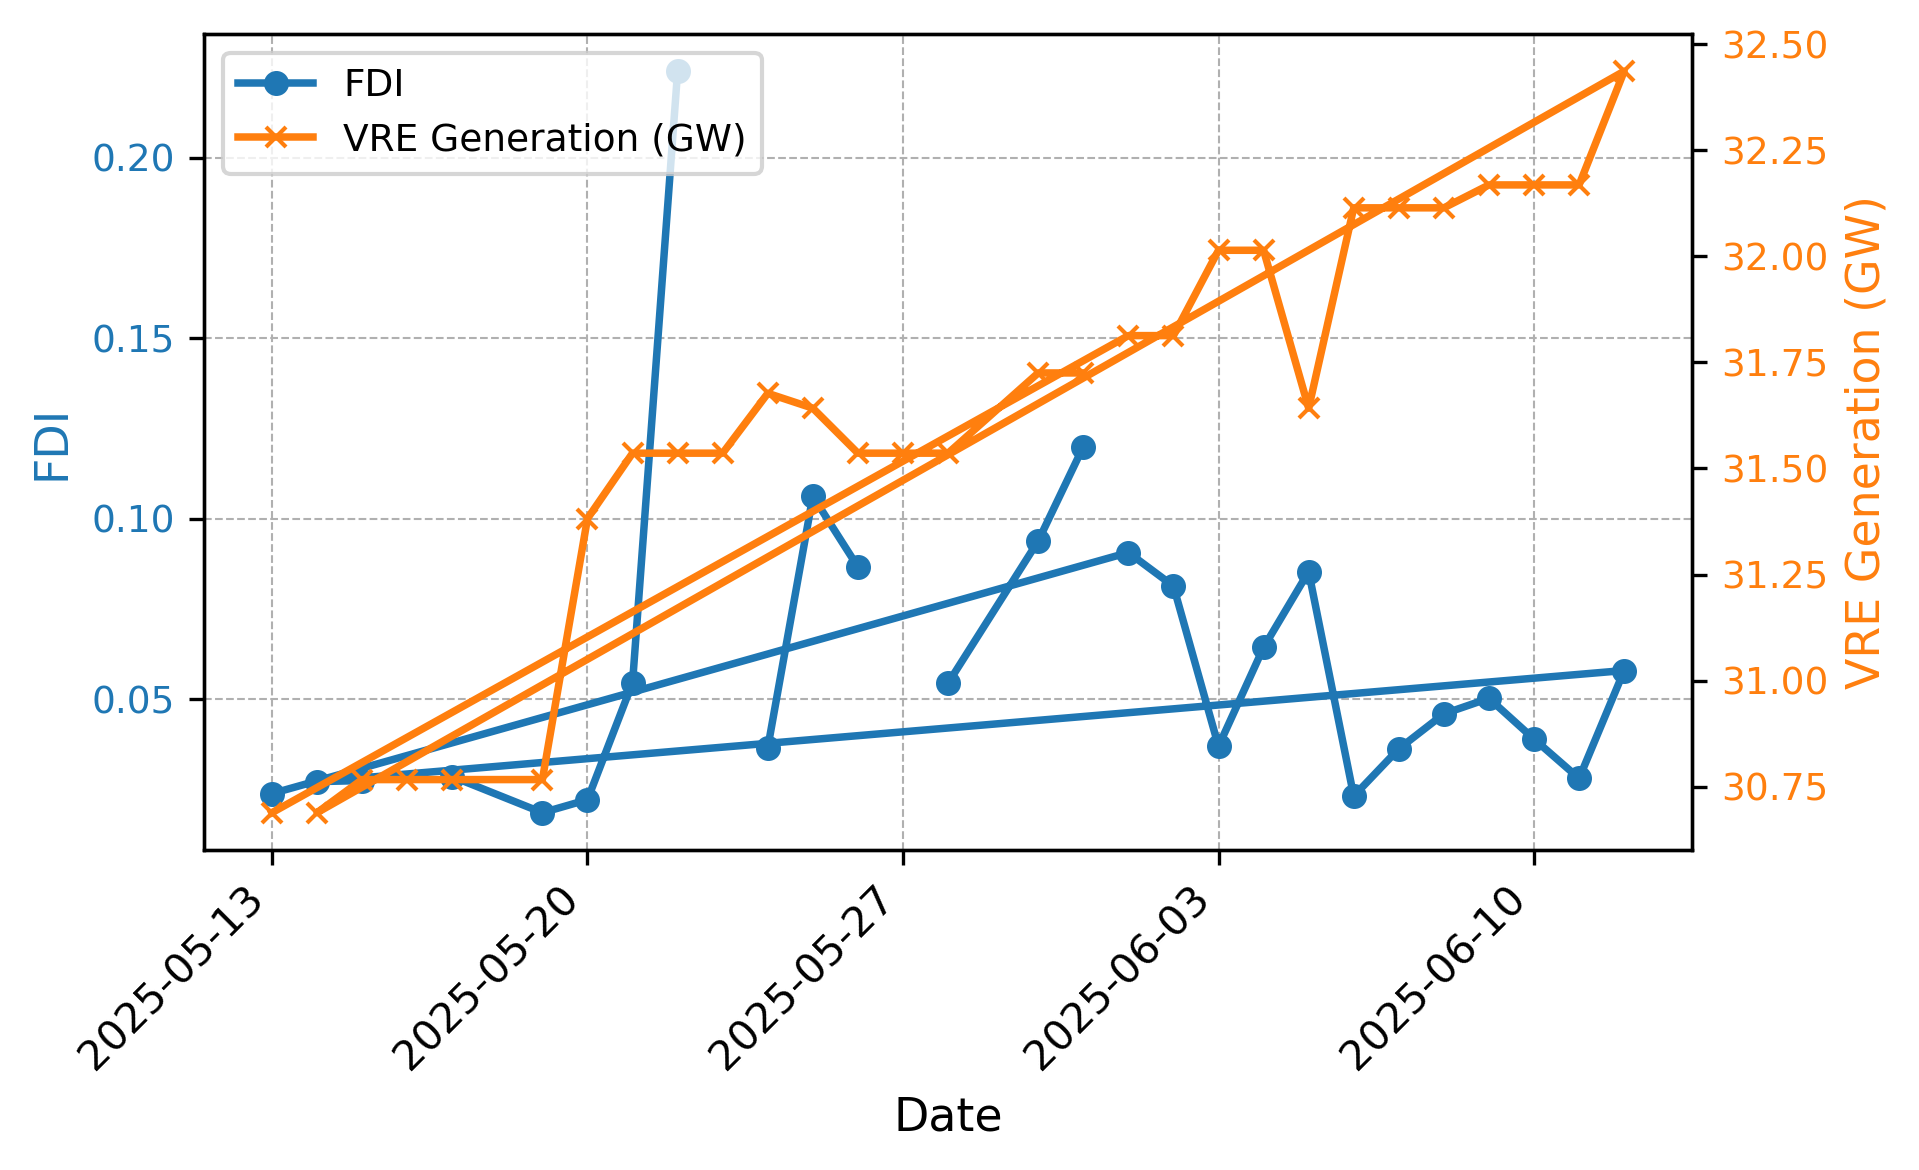

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(6.5, 4), dpi=300)

# Plot FDI (left y-axis)
ax1.plot(simulation_input['date'], simulation_input['fdi'], color='tab:blue',
         label='FDI', marker='o', linewidth=1.8, markersize=5)
ax1.set_xlabel("Date", fontsize=11)
ax1.set_ylabel("FDI", fontsize=11, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=9)
ax1.grid(True, linestyle='--', linewidth=0.5)

# Format x-axis
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate(rotation=45)

# Plot VRE (right y-axis)
ax2 = ax1.twinx()
ax2.plot(simulation_input['date'], simulation_input['vre_generation_mw'] / 1000,
         color='tab:orange', label='VRE Generation (GW)',
         marker='x', linewidth=1.8, markersize=5)
ax2.set_ylabel("VRE Generation (GW)", fontsize=11, color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange', labelsize=9)

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=9)

fig.tight_layout()
plt.savefig("FDI_VRE_DualAxis_CleanDates.png", dpi=300)
plt.show()


In [38]:
simulation_input.to_csv("simulation_input_matlab.csv", index=False)
